In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [22]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [25]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [27]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [29]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [31]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [33]:
# Assign the measurement class to a variable called `Measurement` and
Measurement = Base.classes.measurement
# assign the station class to a variable called `Station`
Station = Base.classes.station

In [35]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

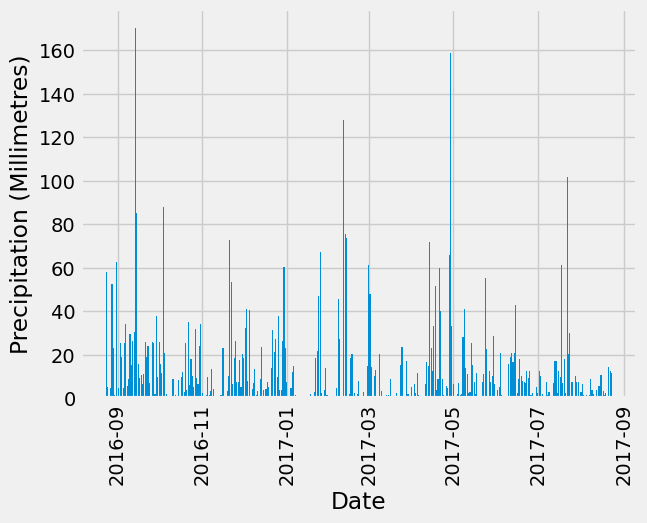

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
last_date = '2016-08-23'

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp)
prcp_df.columns =['date', 'prcp']

# Sort the dataframe by date
prcp_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_values = prcp_df['date'].astype('datetime64[ns]')
y_values = prcp_df['prcp']
plt.xticks(rotation=90)
plt.bar(x_values, y_values)
plt.xlabel('Date')
plt.ylabel('Precipitation (Millimetres)')
plt.show()

In [62]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [68]:
# Design a query to calculate the total number of stations in the dataset
stations_number = session.query(Station.station).count()

9

In [78]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [88]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station==stations_active[0][0]).all()
station_most_active

[(12.2, 29.4, 22.035822510822513)]

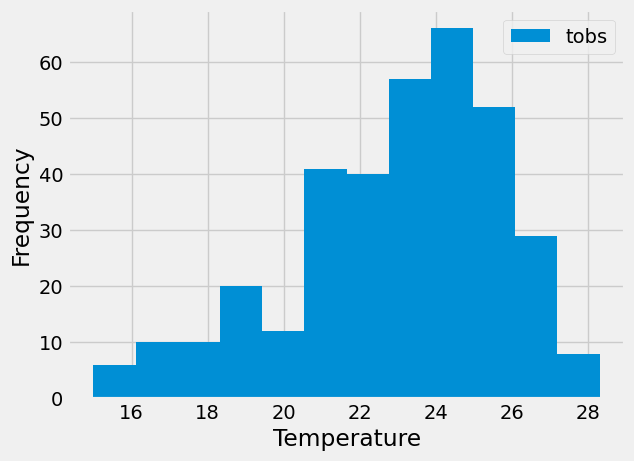

In [98]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
last_12_months = session.query(Measurement.tobs).filter(Measurement.station==stations_active[0][0]).filter(Measurement.date > last_date).all()

# and plot the results as a histogram
histogram_results = pd.DataFrame(last_12_months)
df_hist = histogram_results.plot.hist(bins=12, xlabel='Temperature')

# Close Session

In [100]:
# Close Session
session.close()
